In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
games_df=pd.read_excel('FINAL DATASET1.xlsx')
games_df

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,FINAL COST
0,1,[Prototype 2],X360,2012,Action,Activision,0.48,0.24,0.00,0.07,0.79,74,69,7.0,173,Radical Entertainment,M,29.99
1,2,[Prototype 2],PS3,2012,Action,Activision,0.36,0.28,0.00,0.10,0.74,79,39,6.8,179,Radical Entertainment,M,29.99
2,3,[Prototype 2],PC,2012,Action,Activision,0.07,0.03,0.00,0.01,0.11,76,12,6.4,389,Radical Entertainment,M,9.99
3,4,2010 FIFA World Cup South Africa,PS3,2010,Sports,Electronic Arts,0.30,0.64,0.07,0.22,1.23,82,56,7.8,57,EA Canada,E,42.55
4,5,2010 FIFA World Cup South Africa,X360,2010,Sports,Electronic Arts,0.32,0.42,0.02,0.09,0.85,83,61,8.1,58,Electronic Arts,E,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,1969,ZombiU,WiiU,2012,Action,Ubisoft,0.52,0.36,0.05,0.08,1.01,77,70,7.7,758,Ubisoft Montpellier,M,34.99
1969,1970,Zone of the Enders HD Collection,PS3,2012,Simulation,Konami Digital Entertainment,0.21,0.07,0.09,0.05,0.42,73,27,8.0,42,High Voltage Software,M,25.81
1970,1971,Zumba Fitness,X360,2010,Sports,505 Games,1.74,0.45,0.00,0.18,2.37,42,10,5.5,16,"Pipeworks Software, Inc.",E,57.99
1971,1972,Zumba Fitness Rush,X360,2012,Sports,505 Games,0.00,0.16,0.00,0.02,0.18,73,7,6.2,5,"Majesco Games, Majesco",E10+,14.99


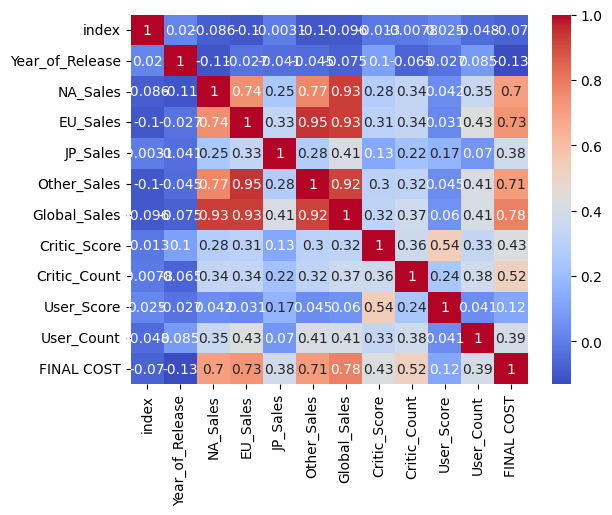

<Figure size 1200x1200 with 0 Axes>

In [ ]:
numeric_columns = games_df.select_dtypes(include=[np.number])
correlation_matrix_numeric = numeric_columns.corr()
correlation_matrix_numericplot = sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
plt.figure(figsize=(12, 12))
plt.show()


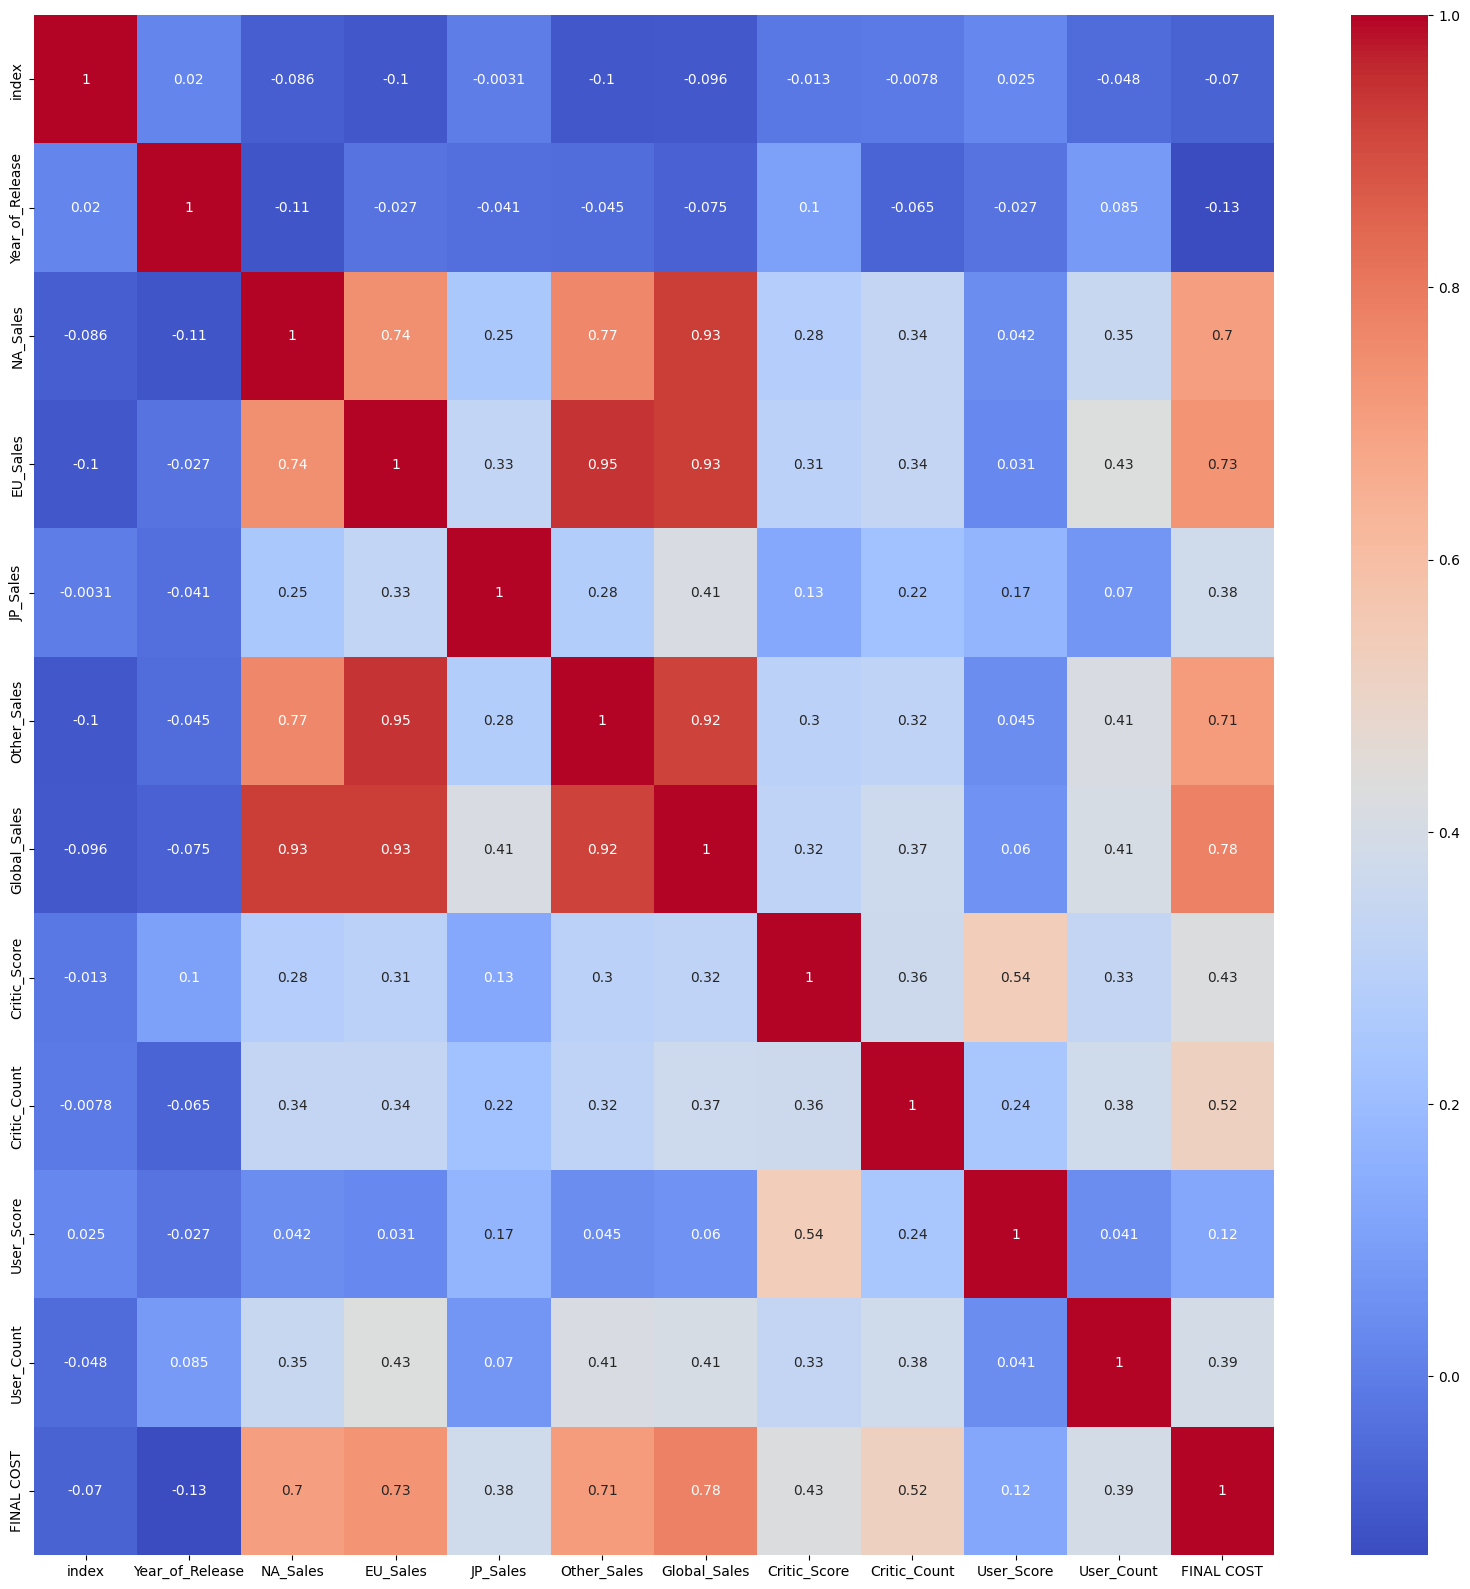

In [ ]:
# prompt: numeric_columns = games_df.select_dtypes(include=[np.number])
# correlation_matrix_numeric = numeric_columns.corr()
# correlation_matrix_numericplot = sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
# plt.figure(figsize=(12, 12))
# plt.show()
# Make the size big

plt.figure(figsize=(20, 20))  # Increased figure size
correlation_matrix_numericplot = sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
games_df = games_df.rename(columns={
    'NA_Sales': 'mil_units_sold_NA',
    'EU_Sales': 'mil_units_sold_EU',
    'JP_Sales': 'mil_units_sold_JP',
    'Other_Sales': 'mil_units_sold_Other',
    'Global_Sales': 'mil_units_sold_Global',
    'FINAL COST': 'game_selling_price'
})

games_df['NA_revenue_mil'] = games_df['game_selling_price'] * games_df['mil_units_sold_NA']
games_df['EU_revenue_mil'] = games_df['game_selling_price'] * games_df['mil_units_sold_EU']
games_df['JP_revenue_mil'] = games_df['game_selling_price'] * games_df['mil_units_sold_JP']
games_df['Other_revenue_mil'] = games_df['game_selling_price'] * games_df['mil_units_sold_Other']
games_df['Global_revenue_mil'] = games_df['game_selling_price'] * games_df['mil_units_sold_Global']

games_df.drop(columns=['index'],inplace=True)

#get me the game with a specific name
# games_df[games_df['Name'] == 'Sonic Colors']

In [ ]:
# check if the rows have the dupliacte values or not
games_df.duplicated().count()

1973

In [ ]:
# games_df.duplicated(keep=False)
games_df.drop_duplicates(inplace=True)

In [ ]:
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,mil_units_sold_NA,mil_units_sold_EU,mil_units_sold_JP,mil_units_sold_Other,mil_units_sold_Global,...,User_Score,User_Count,Developer,Rating,game_selling_price,NA_revenue_mil,EU_revenue_mil,JP_revenue_mil,Other_revenue_mil,Global_revenue_mil
0,[Prototype 2],X360,2012,Action,Activision,0.48,0.24,0.00,0.07,0.79,...,7.0,173,Radical Entertainment,M,29.99,14.3952,7.1976,0.0000,2.0993,23.6921
1,[Prototype 2],PS3,2012,Action,Activision,0.36,0.28,0.00,0.10,0.74,...,6.8,179,Radical Entertainment,M,29.99,10.7964,8.3972,0.0000,2.9990,22.1926
2,[Prototype 2],PC,2012,Action,Activision,0.07,0.03,0.00,0.01,0.11,...,6.4,389,Radical Entertainment,M,9.99,0.6993,0.2997,0.0000,0.0999,1.0989
3,2010 FIFA World Cup South Africa,PS3,2010,Sports,Electronic Arts,0.30,0.64,0.07,0.22,1.23,...,7.8,57,EA Canada,E,42.55,12.7650,27.2320,2.9785,9.3610,52.3365
4,2010 FIFA World Cup South Africa,X360,2010,Sports,Electronic Arts,0.32,0.42,0.02,0.09,0.85,...,8.1,58,Electronic Arts,E,32.00,10.2400,13.4400,0.6400,2.8800,27.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,ZombiU,WiiU,2012,Action,Ubisoft,0.52,0.36,0.05,0.08,1.01,...,7.7,758,Ubisoft Montpellier,M,34.99,18.1948,12.5964,1.7495,2.7992,35.3399
1969,Zone of the Enders HD Collection,PS3,2012,Simulation,Konami Digital Entertainment,0.21,0.07,0.09,0.05,0.42,...,8.0,42,High Voltage Software,M,25.81,5.4201,1.8067,2.3229,1.2905,10.8402
1970,Zumba Fitness,X360,2010,Sports,505 Games,1.74,0.45,0.00,0.18,2.37,...,5.5,16,"Pipeworks Software, Inc.",E,57.99,100.9026,26.0955,0.0000,10.4382,137.4363
1971,Zumba Fitness Rush,X360,2012,Sports,505 Games,0.00,0.16,0.00,0.02,0.18,...,6.2,5,"Majesco Games, Majesco",E10+,14.99,0.0000,2.3984,0.0000,0.2998,2.6982


In [ ]:
# removing the rows in game_df which have 'Name' count as 1
filtered_games_df = games_df[games_df['Name'].map(games_df['Name'].value_counts()) != 1]

In [ ]:
filtered_games_df

,Name,Platform,Year_of_Release,Genre,Publisher,mil_units_sold_NA,mil_units_sold_EU,mil_units_sold_JP,mil_units_sold_Other,mil_units_sold_Global,...,User_Score,User_Count,Developer,Rating,game_selling_price,NA_revenue_mil,EU_revenue_mil,JP_revenue_mil,Other_revenue_mil,Global_revenue_mil
0,[Prototype 2],X360,2012,Action,Activision,0.48,0.24,0.00,0.07,0.79,...,7.0,173,Radical Entertainment,M,29.99,14.3952,7.1976,0.0000,2.0993,23.6921
1,[Prototype 2],PS3,2012,Action,Activision,0.36,0.28,0.00,0.10,0.74,...,6.8,179,Radical Entertainment,M,29.99,10.7964,8.3972,0.0000,2.9990,22.1926
2,[Prototype 2],PC,2012,Action,Activision,0.07,0.03,0.00,0.01,0.11,...,6.4,389,Radical Entertainment,M,9.99,0.6993,0.2997,0.0000,0.0999,1.0989
3,2010 FIFA World Cup South Africa,PS3,2010,Sports,Electronic Arts,0.30,0.64,0.07,0.22,1.23,...,7.8,57,EA Canada,E,42.55,12.7650,27.2320,2.9785,9.3610,52.3365
4,2010 FIFA World Cup South Africa,X360,2010,Sports,Electronic Arts,0.32,0.42,0.02,0.09,0.85,...,8.1,58,Electronic Arts,E,32.00,10.2400,13.4400,0.6400,2.8800,27.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,XCOM: Enemy Unknown,PS3,2012,Strategy,Take-Two Interactive,0.24,0.23,0.00,0.10,0.57,...,8.2,296,Firaxis Games,M,29.99,7.1976,6.8977,0.0000,2.9990,17.0943
1958,X-Men: Destiny,PS3,2011,Action,Activision,0.14,0.07,0.00,0.03,0.24,...,4.8,37,Silicon Knights,T,19.99,2.7986,1.3993,0.0000,0.5997,4.7976
1959,X-Men: Destiny,X360,2011,Action,Activision,0.18,0.04,0.00,0.02,0.24,...,5.0,72,Silicon Knights,T,19.99,3.5982,0.7996,0.0000,0.3998,4.7976
1960,X-Men: Destiny,Wii,2011,Action,Activision,0.07,0.02,0.00,0.01,0.10,...,4.5,15,Silicon Knights,T,9.49,0.6643,0.1898,0.0000,0.0949,0.9490


In [ ]:
# getting the count of Names in the dataset games_df using groupby on Name column
filtered_games_df.groupby('Name')['Name'].count()

,Name
Name,
2010 FIFA World Cup South Africa,4
2014 FIFA World Cup Brazil,2
7 Days to Die,2
Ace Combat: Assault Horizon,2
Adventure Time: The Secret of the Nameless Kingdom,2
...,...
X-Men: Destiny,4
XCOM: Enemy Unknown,3
[Prototype 2],3


In [ ]:
final_dataset = filtered_games_df
final_dataset

,Name,Platform,Year_of_Release,Genre,Publisher,mil_units_sold_NA,mil_units_sold_EU,mil_units_sold_JP,mil_units_sold_Other,mil_units_sold_Global,...,User_Score,User_Count,Developer,Rating,game_selling_price,NA_revenue_mil,EU_revenue_mil,JP_revenue_mil,Other_revenue_mil,Global_revenue_mil
0,[Prototype 2],X360,2012,Action,Activision,0.48,0.24,0.00,0.07,0.79,...,7.0,173,Radical Entertainment,M,29.99,14.3952,7.1976,0.0000,2.0993,23.6921
1,[Prototype 2],PS3,2012,Action,Activision,0.36,0.28,0.00,0.10,0.74,...,6.8,179,Radical Entertainment,M,29.99,10.7964,8.3972,0.0000,2.9990,22.1926
2,[Prototype 2],PC,2012,Action,Activision,0.07,0.03,0.00,0.01,0.11,...,6.4,389,Radical Entertainment,M,9.99,0.6993,0.2997,0.0000,0.0999,1.0989
3,2010 FIFA World Cup South Africa,PS3,2010,Sports,Electronic Arts,0.30,0.64,0.07,0.22,1.23,...,7.8,57,EA Canada,E,42.55,12.7650,27.2320,2.9785,9.3610,52.3365
4,2010 FIFA World Cup South Africa,X360,2010,Sports,Electronic Arts,0.32,0.42,0.02,0.09,0.85,...,8.1,58,Electronic Arts,E,32.00,10.2400,13.4400,0.6400,2.8800,27.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,XCOM: Enemy Unknown,PS3,2012,Strategy,Take-Two Interactive,0.24,0.23,0.00,0.10,0.57,...,8.2,296,Firaxis Games,M,29.99,7.1976,6.8977,0.0000,2.9990,17.0943
1958,X-Men: Destiny,PS3,2011,Action,Activision,0.14,0.07,0.00,0.03,0.24,...,4.8,37,Silicon Knights,T,19.99,2.7986,1.3993,0.0000,0.5997,4.7976
1959,X-Men: Destiny,X360,2011,Action,Activision,0.18,0.04,0.00,0.02,0.24,...,5.0,72,Silicon Knights,T,19.99,3.5982,0.7996,0.0000,0.3998,4.7976
1960,X-Men: Destiny,Wii,2011,Action,Activision,0.07,0.02,0.00,0.01,0.10,...,4.5,15,Silicon Knights,T,9.49,0.6643,0.1898,0.0000,0.0949,0.9490


In [ ]:
d1 = final_dataset[['Platform','Genre','game_selling_price','Rating','mil_units_sold_Global']]
# data = final_dataset[['Platform','Genre','Rating','game_selling_price','Critic_Score']]
d1.head()

,Platform,Genre,game_selling_price,Rating,mil_units_sold_Global
0,X360,Action,29.99,M,0.79
1,PS3,Action,29.99,M,0.74
2,PC,Action,9.99,M,0.11
3,PS3,Sports,42.55,E,1.23
4,X360,Sports,32.00,E,0.85


In [ ]:
# Define the number of bins
# num_bins = 2  # Adjust as needed

# Function to get top N bins for a categorical feature
def get_top_bins(df, column, num_bins):
    # Get counts for each category in the column
    value_counts = df[column].value_counts()
    # Get the top N categories
    top_categories = value_counts.nlargest(num_bins).index.tolist()
    print(f"Top {num_bins} categories for {column}: {top_categories}")
    # Filter the DataFrame to include only rows with these top categories
    return df[df[column].isin(top_categories)]

# Apply the function to each categorical column
top_genre_df = get_top_bins(d1, 'Genre', 3)
top_platform_df = get_top_bins(top_genre_df, 'Platform', 3)

# top_rating_df = get_top_bins(conjoint_analysis_data, 'Rating', 4)

# Display results
print("\nTop Genres based on counts:")
print(top_genre_df)
print("Top Platforms based on counts:")
print(top_platform_df)

# print("\nTop Ratings based on counts:")
# print(top_rating_df)
top_platform_df

Top 3 categories for Genre: ['Action', 'Shooter', 'Sports']
Top 3 categories for Platform: ['PS3', 'X360', 'PC']

Top Genres based on counts:
     Platform   Genre  game_selling_price Rating  mil_units_sold_Global
0        X360  Action               29.99      M                   0.79
1         PS3  Action               29.99      M                   0.74
2          PC  Action                9.99      M                   0.11
3         PS3  Sports               42.55      E                   1.23
4        X360  Sports               32.00      E                   0.85
...       ...     ...                 ...    ...                    ...
1943     XOne  Sports               19.99      T                   0.26
1958      PS3  Action               19.99      T                   0.24
1959     X360  Action               19.99      T                   0.24
1960      Wii  Action                9.49      T                   0.10
1961       DS  Action                7.25   E10+                  

,Platform,Genre,game_selling_price,Rating,mil_units_sold_Global
0,X360,Action,29.99,M,0.79
1,PS3,Action,29.99,M,0.74
2,PC,Action,9.99,M,0.11
3,PS3,Sports,42.55,E,1.23
4,X360,Sports,32.00,E,0.85
...,...,...,...,...,...
1935,PS3,Sports,39.99,T,1.14
1936,X360,Sports,29.99,T,0.64
1938,PS3,Sports,29.99,T,0.78
1958,PS3,Action,19.99,T,0.24


In [ ]:
top_platform_df.describe()

,game_selling_price,mil_units_sold_Global
count,562.000000,562.000000
mean,30.491441,1.087936
std,19.964997,2.118967
min,0.000000,0.010000
25%,17.967500,0.190000
50%,28.110000,0.450000
75%,34.990000,1.030000
max,131.010000,21.040000


Based on the game_selling_price summary statistics you’ve provided, you can define bins that reflect the distribution of prices. Here’s a suggested naming scheme for each quartile:
- Low: Prices between min (1.19) and the 25th percentile (9.50).
- Medium: Prices between the 25th percentile (9.50) and the 50th percentile (16.99).
- High: Prices between the 50th percentile (16.99) and the 75th percentile (32.99).
- Very High: Prices between the 75th percentile (32.99) and max (199.00).

In [ ]:
num_price_bins = 4

# Explicitly create a copy to avoid SettingWithCopyWarning
top_platform_df = top_platform_df.copy()

# Apply quantile-based binning to game_selling_price
#top_platform_df['game_selling_price_bin'] = pd.qcut(top_platform_df['game_selling_price'], q=num_price_bins)
#bin_averages = top_platform_df.groupby('game_selling_price_bin')['game_selling_price'].mean()
#top_platform_df['game_selling_price_bin'] = top_platform_df['game_selling_price_bin'].map(bin_averages)
#bin_averages


In [ ]:
top_platform_df['mil_units_sold_Global']=top_platform_df['mil_units_sold_Global']*(10**6)
top_platform_df

,Platform,Genre,game_selling_price,Rating,mil_units_sold_Global
0,X360,Action,29.99,M,790000.0
1,PS3,Action,29.99,M,740000.0
2,PC,Action,9.99,M,110000.0
3,PS3,Sports,42.55,E,1230000.0
4,X360,Sports,32.00,E,850000.0
...,...,...,...,...,...
1935,PS3,Sports,39.99,T,1140000.0
1936,X360,Sports,29.99,T,640000.0
1938,PS3,Sports,29.99,T,780000.0
1958,PS3,Action,19.99,T,240000.0


In [ ]:
top_platform_df

,Platform,Genre,game_selling_price,Rating,mil_units_sold_Global
0,X360,Action,29.99,M,790000.0
1,PS3,Action,29.99,M,740000.0
2,PC,Action,9.99,M,110000.0
3,PS3,Sports,42.55,E,1230000.0
4,X360,Sports,32.00,E,850000.0
...,...,...,...,...,...
1935,PS3,Sports,39.99,T,1140000.0
1936,X360,Sports,29.99,T,640000.0
1938,PS3,Sports,29.99,T,780000.0
1958,PS3,Action,19.99,T,240000.0


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split

# # Assuming 'top_platform_df' is your DataFrame
# top_platform_df_encoded = pd.get_dummies(top_platform_df, columns=['Platform','Genre', 'Rating'], drop_first=True)

# # Define feature and target variables
# X = top_platform_df_encoded.drop(columns=['mil_units_sold_Global'])
# y = top_platform_df_encoded['mil_units_sold_Global']

# # Create polynomial features for game_selling_price (quadratic)
# poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
# X_price_poly = poly_transformer.fit_transform(X[['game_selling_price']])

# # Combine polynomial transformed price with the rest of the features
# X_final = np.hstack((X_price_poly, X.drop(columns=['game_selling_price']).values))

# # Get feature names for polynomial terms of game_selling_price and other columns
# feature_names = poly_transformer.get_feature_names_out(['game_selling_price']).tolist() + X.drop(columns=['game_selling_price']).columns.tolist()

# # Fit a linear regression model on the transformed data
# model = LinearRegression()
# model.fit(X_final, y)

# # Create a DataFrame for coefficients
# coefficients = pd.DataFrame({
#     "Feature": feature_names,
#     "Coefficient": model.coef_
# })

# # Display the coefficients
# print("Model Coefficients:")
# print(coefficients)

# # Optional: Predict and evaluate model
# y_pred = model.predict(X_final)
# print("\nSample Predictions:")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

top_platform_df1=top_platform_df.copy()
top_platform_df1.drop(columns=['Platform'],inplace=True)
top_platform_df1

top_platform_df_encoded = pd.get_dummies(top_platform_df1, columns=['Genre', 'Rating'], drop_first=True)

# Define feature and target variables
X = top_platform_df_encoded.drop(columns=['mil_units_sold_Global'])
y = top_platform_df_encoded['mil_units_sold_Global']

# Reset indices to ensure they align
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Create polynomial features for game_selling_price (quadratic)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_price_poly = poly_transformer.fit_transform(X[['game_selling_price']])

# Combine polynomial transformed price with the rest of the features
X_final = np.hstack((X_price_poly, X.drop(columns=['game_selling_price']).values))

# Get feature names for polynomial terms of game_selling_price and other columns
feature_names = poly_transformer.get_feature_names_out(['game_selling_price']).tolist() + X.drop(columns=['game_selling_price']).columns.tolist()

# Convert X_final back to a DataFrame with appropriate feature names for use in statsmodels
X_final_df = pd.DataFrame(X_final, columns=feature_names)

# Add a constant to the model for the intercept
X_final_df = sm.add_constant(X_final_df)

# Fit the model using statsmodels to get detailed statistics
model = sm.OLS(y, X_final_df).fit()

# Get the summary statistics
model_summary = model.summary()

# Extract the p-values, t-values, R^2, and adjusted R^2 from the model
coeff_summary = pd.DataFrame({
    "Feature": model.params.index,
    "Coefficient": model.params.values,
    "t_value": model.tvalues.values,
    "p_value": model.pvalues.values
})

# Add R^2 and Adjusted R^2 as a single-row DataFrame
r2_values = pd.DataFrame({
    "Metric": ["R^2", "Adjusted R^2"],
    "Value": [model.rsquared, model.rsquared_adj]
})

print("Coefficients, t-values, and p-values:")
print(coeff_summary)
print("\nR^2 and Adjusted R^2:")
print(r2_values)


Coefficients, t-values, and p-values:
                Feature    Coefficient    t_value       p_value
0                 const  101555.775763   0.416190  6.774324e-01
1    game_selling_price  -24325.214654  -3.149788  1.722007e-03
2  game_selling_price^2    1194.403694  14.132234  6.043106e-39
3         Genre_Shooter  -54076.321524  -0.429865  6.674612e-01
4          Genre_Sports   29390.061978   0.133665  8.937158e-01
5           Rating_E10+   75132.840882   0.302111  7.626806e-01
6              Rating_M  248712.128138   1.079020  2.810482e-01
7              Rating_T   94019.101157   0.406898  6.842402e-01

R^2 and Adjusted R^2:
         Metric     Value
0           R^2  0.673666
1  Adjusted R^2  0.669542


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

top_platform_df2=top_platform_df.copy()
top_platform_df2.drop(columns=['Genre'],inplace=True)
top_platform_df2

top_platform_df_encoded = pd.get_dummies(top_platform_df2, columns=['Platform', 'Rating'], drop_first=True)

# Define feature and target variables
X = top_platform_df_encoded.drop(columns=['mil_units_sold_Global'])
y = top_platform_df_encoded['mil_units_sold_Global']

# Reset indices to ensure they align
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Create polynomial features for game_selling_price (quadratic)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_price_poly = poly_transformer.fit_transform(X[['game_selling_price']])

# Combine polynomial transformed price with the rest of the features
X_final = np.hstack((X_price_poly, X.drop(columns=['game_selling_price']).values))

# Get feature names for polynomial terms of game_selling_price and other columns
feature_names = poly_transformer.get_feature_names_out(['game_selling_price']).tolist() + X.drop(columns=['game_selling_price']).columns.tolist()

# Convert X_final back to a DataFrame with appropriate feature names for use in statsmodels
X_final_df = pd.DataFrame(X_final, columns=feature_names)

# Add a constant to the model for the intercept
X_final_df = sm.add_constant(X_final_df)

# Fit the model using statsmodels to get detailed statistics
model = sm.OLS(y, X_final_df).fit()

# Get the summary statistics
model_summary = model.summary()

# Extract the p-values, t-values, R^2, and adjusted R^2 from the model
coeff_summary = pd.DataFrame({
    "Feature": model.params.index,
    "Coefficient": model.params.values,
    "t_value": model.tvalues.values,
    "p_value": model.pvalues.values
})

# Add R^2 and Adjusted R^2 as a single-row DataFrame
r2_values = pd.DataFrame({
    "Metric": ["R^2", "Adjusted R^2"],
    "Value": [model.rsquared, model.rsquared_adj]
})

print("Coefficients, t-values, and p-values:")
print(coeff_summary)
print("\nR^2 and Adjusted R^2:")
print(r2_values)


Coefficients, t-values, and p-values:
                Feature    Coefficient    t_value       p_value
0                 const   92319.725281   0.494781  6.209506e-01
1    game_selling_price  -27133.527634  -3.209652  1.405884e-03
2  game_selling_price^2    1213.697391  13.816975  1.596014e-37
3          Platform_PS3  147589.455596   0.968734  3.331008e-01
4         Platform_X360   83153.315773   0.551819  5.812952e-01
5           Rating_E10+   47482.269983   0.235915  8.135855e-01
6              Rating_M  211206.148740   1.523109  1.283021e-01
7              Rating_T   56451.199295   0.338374  7.352097e-01

R^2 and Adjusted R^2:
         Metric     Value
0           R^2  0.674112
1  Adjusted R^2  0.669994


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

top_platform_df3=top_platform_df.copy()

top_platform_df_encoded = pd.get_dummies(top_platform_df3, columns=['Genre','Platform', 'Rating'], drop_first=True)

# Define feature and target variables
X = top_platform_df_encoded.drop(columns=['mil_units_sold_Global'])
y = top_platform_df_encoded['mil_units_sold_Global']

# Reset indices to ensure they align
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Create polynomial features for game_selling_price (quadratic)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_price_poly = poly_transformer.fit_transform(X[['game_selling_price']])

# Combine polynomial transformed price with the rest of the features
X_final = np.hstack((X_price_poly, X.drop(columns=['game_selling_price']).values))

# Get feature names for polynomial terms of game_selling_price and other columns
feature_names = poly_transformer.get_feature_names_out(['game_selling_price']).tolist() + X.drop(columns=['game_selling_price']).columns.tolist()

# Convert X_final back to a DataFrame with appropriate feature names for use in statsmodels
X_final_df = pd.DataFrame(X_final, columns=feature_names)

# Add a constant to the model for the intercept
X_final_df = sm.add_constant(X_final_df)

# Fit the model using statsmodels to get detailed statistics
model = sm.OLS(y, X_final_df).fit()

# Get the summary statistics
model_summary = model.summary()

# Extract the p-values, t-values, R^2, and adjusted R^2 from the model
coeff_summary = pd.DataFrame({
    "Feature": model.params.index,
    "Coefficient": model.params.values,
    "t_value": model.tvalues.values,
    "p_value": model.pvalues.values
})

# Add R^2 and Adjusted R^2 as a single-row DataFrame
r2_values = pd.DataFrame({
    "Metric": ["R^2", "Adjusted R^2"],
    "Value": [model.rsquared, model.rsquared_adj]
})

print("Coefficients, t-values, and p-values:")
print(coeff_summary)
print("\nR^2 and Adjusted R^2:")
print(r2_values)


Coefficients, t-values, and p-values:
                Feature    Coefficient    t_value       p_value
0                 const   79726.476985   0.324164  7.459364e-01
1    game_selling_price  -27316.410545  -3.212956  1.390390e-03
2  game_selling_price^2    1216.652060  13.750406  3.300467e-37
3         Genre_Shooter  -49170.722799  -0.390002  6.966858e-01
4          Genre_Sports   21242.758936   0.096413  9.232278e-01
5          Platform_PS3  144132.858382   0.942573  3.463117e-01
6         Platform_X360   79652.770455   0.526609  5.986764e-01
7           Rating_E10+   69098.448145   0.277189  7.817389e-01
8              Rating_M  252637.288663   1.094774  2.740932e-01
9              Rating_T   80841.181823   0.348449  7.276355e-01

R^2 and Adjusted R^2:
         Metric     Value
0           R^2  0.674209
1  Adjusted R^2  0.668897


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

top_platform_df4=top_platform_df.copy()
top_platform_df4.drop(columns=['Genre','Platform', 'Rating'],inplace=True)

top_platform_df_encoded=top_platform_df4
#top_platform_df_encoded = pd.get_dummies(top_platform_df2, columns=['Platform', 'Rating'], drop_first=True)

# Define feature and target variables
X = top_platform_df_encoded.drop(columns=['mil_units_sold_Global'])
y = top_platform_df_encoded['mil_units_sold_Global']

# Reset indices to ensure they align
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Create polynomial features for game_selling_price (quadratic)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_price_poly = poly_transformer.fit_transform(X[['game_selling_price']])

# Combine polynomial transformed price with the rest of the features
X_final = np.hstack((X_price_poly, X.drop(columns=['game_selling_price']).values))

# Get feature names for polynomial terms of game_selling_price and other columns
feature_names = poly_transformer.get_feature_names_out(['game_selling_price']).tolist() + X.drop(columns=['game_selling_price']).columns.tolist()

# Convert X_final back to a DataFrame with appropriate feature names for use in statsmodels
X_final_df = pd.DataFrame(X_final, columns=feature_names)

# Add a constant to the model for the intercept
X_final_df = sm.add_constant(X_final_df)

# Fit the model using statsmodels to get detailed statistics
model = sm.OLS(y, X_final_df).fit()

# Get the summary statistics
model_summary = model.summary()

# Extract the p-values, t-values, R^2, and adjusted R^2 from the model
coeff_summary = pd.DataFrame({
    "Feature": model.params.index,
    "Coefficient": model.params.values,
    "t_value": model.tvalues.values,
    "p_value": model.pvalues.values
})

# Add R^2 and Adjusted R^2 as a single-row DataFrame
r2_values = pd.DataFrame({
    "Metric": ["R^2", "Adjusted R^2"],
    "Value": [model.rsquared, model.rsquared_adj]
})

print("Coefficients, t-values, and p-values:")
print(coeff_summary)
print("\nR^2 and Adjusted R^2:")
print(r2_values)


Coefficients, t-values, and p-values:
                Feature    Coefficient    t_value       p_value
0                 const  243398.996843   1.702157  8.928193e-02
1    game_selling_price  -24538.588300  -3.221561  1.349103e-03
2  game_selling_price^2    1199.706273  14.402930  3.155177e-40

R^2 and Adjusted R^2:
         Metric     Value
0           R^2  0.671991
1  Adjusted R^2  0.670818


In [ ]:
test_model = final_dataset[['Platform','Genre','User_Score','Critic_Score','Rating','mil_units_sold_Global']]
# data = final_dataset[['Platform','Genre','Rating','game_selling_price','Critic_Score']]
test_model.head()

,Platform,Genre,User_Score,Critic_Score,Rating,mil_units_sold_Global
0,X360,Action,7.0,74,M,0.79
1,PS3,Action,6.8,79,M,0.74
2,PC,Action,6.4,76,M,0.11
3,PS3,Sports,7.8,82,E,1.23
4,X360,Sports,8.1,83,E,0.85


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming final_dataset is already loaded and structured as described

# Get dummy variables for categorical columns
test_model = pd.get_dummies(test_model, columns=['Platform', 'Genre', 'Rating'], drop_first=True)

# Define features (X) and target (y)
X = test_model.drop(columns=['mil_units_sold_Global'])
y = test_model['mil_units_sold_Global']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.2338914948997364
R-squared: 0.24987010291885126


# FINAL Model

In [ ]:
d1 = final_dataset[['Platform','Genre','game_selling_price','Rating','mil_units_sold_Global','mil_units_sold_EU','mil_units_sold_NA']]
# data = final_dataset[['Platform','Genre','Rating','game_selling_price','Critic_Score']]
d1.head()
# Apply the function to each categorical column
top_genre_df = get_top_bins(d1, 'Genre', 3)
top_platform_dfx = get_top_bins(top_genre_df, 'Platform', 3)

Top 3 categories for Genre: ['Action', 'Shooter', 'Sports']
Top 3 categories for Platform: ['PS3', 'X360', 'PC']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

top_platform_df2=top_platform_dfx.copy()
top_platform_df2.drop(columns=['Genre','mil_units_sold_Global','mil_units_sold_EU'],inplace=True)
top_platform_df2

top_platform_df_encoded = pd.get_dummies(top_platform_df2, columns=['Platform', 'Rating'], drop_first=True)

# Define feature and target variables
X = top_platform_df_encoded.drop(columns=['mil_units_sold_NA'])
y = top_platform_df_encoded['mil_units_sold_NA']

# Reset indices to ensure they align
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Create polynomial features for game_selling_price (quadratic)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_price_poly = poly_transformer.fit_transform(X[['game_selling_price']])

# Combine polynomial transformed price with the rest of the features
X_final = np.hstack((X_price_poly, X.drop(columns=['game_selling_price']).values))

# Get feature names for polynomial terms of game_selling_price and other columns
feature_names = poly_transformer.get_feature_names_out(['game_selling_price']).tolist() + X.drop(columns=['game_selling_price']).columns.tolist()

# Convert X_final back to a DataFrame with appropriate feature names for use in statsmodels
X_final_df = pd.DataFrame(X_final, columns=feature_names)

# Add a constant to the model for the intercept
X_final_df = sm.add_constant(X_final_df)

# Fit the model using statsmodels to get detailed statistics
model = sm.OLS(y, X_final_df).fit()

# Get the summary statistics
model_summary = model.summary()

# Extract the p-values, t-values, R^2, and adjusted R^2 from the model
coeff_summary = pd.DataFrame({
    "Feature": model.params.index,
    "Coefficient": model.params.values,
    "t_value": model.tvalues.values,
    "p_value": model.pvalues.values
})

# Add R^2 and Adjusted R^2 as a single-row DataFrame
r2_values = pd.DataFrame({
    "Metric": ["R^2", "Adjusted R^2"],
    "Value": [model.rsquared, model.rsquared_adj]
})

print("Coefficients, t-values, and p-values:")
print(coeff_summary)
print("\nR^2 and Adjusted R^2:")
print(r2_values)


Coefficients, t-values, and p-values:
                Feature  Coefficient    t_value       p_value
0                 const     0.038901   0.387007  6.988996e-01
1    game_selling_price    -0.014151  -3.107209  1.985426e-03
2  game_selling_price^2     0.000609  12.878291  2.199299e-33
3          Platform_PS3     0.000692   0.008437  9.932711e-01
4         Platform_X360     0.226274   2.787316  5.497036e-03
5           Rating_E10+     0.010647   0.098198  9.218109e-01
6              Rating_M     0.063472   0.849656  3.958835e-01
7              Rating_T    -0.001177  -0.013091  9.895603e-01

R^2 and Adjusted R^2:
         Metric     Value
0           R^2  0.642971
1  Adjusted R^2  0.638460


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

top_platform_df2=top_platform_dfx.copy()
top_platform_df2.drop(columns=['Genre','mil_units_sold_Global','mil_units_sold_NA'],inplace=True)
top_platform_df2

top_platform_df_encoded = pd.get_dummies(top_platform_df2, columns=['Platform', 'Rating'], drop_first=True)

# Define feature and target variables
X = top_platform_df_encoded.drop(columns=['mil_units_sold_EU'])
y = top_platform_df_encoded['mil_units_sold_EU']

# Reset indices to ensure they align
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Create polynomial features for game_selling_price (quadratic)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_price_poly = poly_transformer.fit_transform(X[['game_selling_price']])

# Combine polynomial transformed price with the rest of the features
X_final = np.hstack((X_price_poly, X.drop(columns=['game_selling_price']).values))

# Get feature names for polynomial terms of game_selling_price and other columns
feature_names = poly_transformer.get_feature_names_out(['game_selling_price']).tolist() + X.drop(columns=['game_selling_price']).columns.tolist()

# Convert X_final back to a DataFrame with appropriate feature names for use in statsmodels
X_final_df = pd.DataFrame(X_final, columns=feature_names)

# Add a constant to the model for the intercept
X_final_df = sm.add_constant(X_final_df)

# Fit the model using statsmodels to get detailed statistics
model = sm.OLS(y, X_final_df).fit()

# Get the summary statistics
model_summary = model.summary()

# Extract the p-values, t-values, R^2, and adjusted R^2 from the model
coeff_summary = pd.DataFrame({
    "Feature": model.params.index,
    "Coefficient": model.params.values,
    "t_value": model.tvalues.values,
    "p_value": model.pvalues.values
})

# Add R^2 and Adjusted R^2 as a single-row DataFrame
r2_values = pd.DataFrame({
    "Metric": ["R^2", "Adjusted R^2"],
    "Value": [model.rsquared, model.rsquared_adj]
})

print("Coefficients, t-values, and p-values:")
print(coeff_summary)
print("\nR^2 and Adjusted R^2:")
print(r2_values)


Coefficients, t-values, and p-values:
                Feature  Coefficient    t_value       p_value
0                 const     0.056634   0.691368  4.896240e-01
1    game_selling_price    -0.008925  -2.404844  1.650641e-02
2  game_selling_price^2     0.000431  11.165567  3.001302e-26
3          Platform_PS3     0.022891   0.342239  7.323009e-01
4         Platform_X360    -0.104096  -1.573500  1.161741e-01
5           Rating_E10+     0.041765   0.472660  6.366422e-01
6              Rating_M     0.099613   1.636277  1.023496e-01
7              Rating_T     0.041249   0.563179  5.735409e-01

R^2 and Adjusted R^2:
         Metric     Value
0           R^2  0.580033
1  Adjusted R^2  0.574727
